## loading the important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import re

## loading the dataset

In [2]:
data = pd.read_csv('my_data.csv')

## sneak peak for my data

In [3]:
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


## handel the missing values

In [4]:
data.count()

reviews.rating    34627
reviews.text      34659
dtype: int64

In [5]:
data.isnull().sum()

reviews.rating    33
reviews.text       1
dtype: int64

In [6]:
data1 = data.dropna()

In [7]:
data1.isnull().sum()

reviews.rating    0
reviews.text      0
dtype: int64

In [8]:
data1.count()

reviews.rating    34626
reviews.text      34626
dtype: int64

### replace the values 5.0,4.0 ---> 1 and 3.0, 2.0, 1.0 ---> 0

In [9]:
data1['reviews.rating'].replace({5.0: 1, 4.0: 1, 3.0: 0, 2.0: 0, 1.0: 0}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3592\3469686551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['reviews.rating'].replace({5.0: 1, 4.0: 1, 3.0: 0, 2.0: 0, 1.0: 0}, inplace=True)


In [10]:
data1.head()

,reviews.rating,reviews.text
0,1.0,This product so far has not disappointed. My c...
1,1.0,great for beginner or experienced person. Boug...
2,1.0,Inexpensive tablet for him to use and learn on...
3,1.0,I've had my Fire HD 8 two weeks now and I love...
4,1.0,I bought this for my grand daughter when she c...


### to see if my data is palanced or not

(array([ 2311.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

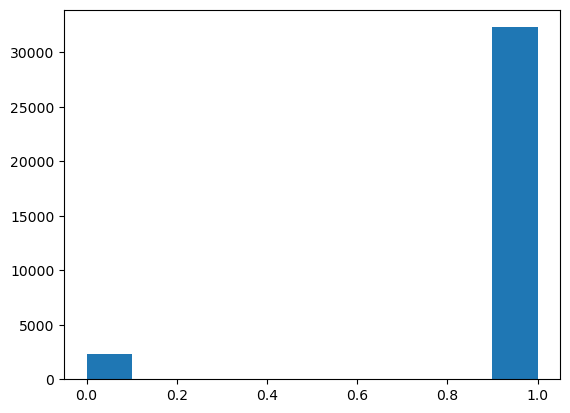

In [11]:
plt.hist(data1['reviews.rating'])

### observation from the graph
#### so my data seams imbalance the number of positve reviwes is larger than the negative and this can lead to make the result bais

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### creat the function that clean text

In [13]:
stop = stopwords.words('english')
lem = WordNetLemmatizer()

def clean(sent):
    if not isinstance(sent, str):
        print(sent)
        return sent
    
    # Implement this function
    sent = sent.lower()
    sent = re.sub('\s+', ' ', sent)
    sent = sent.strip()
    sent = re.compile('<.*?>').sub('',sent)
    # Remove special characters and digits
    sent=re.sub("(\\d|\\W)+"," ",sent)
    sent=re.sub("br","",sent)
    filtered_sentence = []
    
    for w in word_tokenize(sent):
        # You are applying custom filtering here. Feel free to try different things.
        # Check if it is not numeric, the length > 2, and it is not in stopwords.
        if(not w.isnumeric()) and (len(w)>2) and (w not in stop):  
            # Stem and add to filtered list
            filtered_sentence.append(lem.lemmatize(w))
    final_string = " ".join(filtered_sentence) # Final string of cleaned words
    return final_string

In [14]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
data1['reviews.text'] = data1['reviews.text'].apply(clean)

C:\Users\HP\AppData\Local\Temp\ipykernel_3592\829422229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['reviews.text'] = data1['reviews.text'].apply(clean)


In [16]:
data1.head()

,reviews.rating,reviews.text
0,1.0,product far disappointed child love use like a...
1,1.0,great beginner experienced person bought gift ...
2,1.0,inexpensive tablet use learn step nabi thrille...
3,1.0,fire two week love tablet great value prime me...
4,1.0,bought grand daughter come visit set user ente...


### convert the word to vectors

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of text documents.
text_documents = data1['reviews.text']

# Create a CountVectorizer object.
vectorizer = CountVectorizer()

# Convert the text documents to a matrix of token counts.
X = vectorizer.fit_transform(text_documents)

# Print the matrix of token counts.
print(X.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### spliting the data

In [18]:
x_data = X
y_data = data1['reviews.rating']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, stratify=y_data)

### Create an instance of the SMOTE oversampling technique

In [21]:
from imblearn.over_sampling import SMOTE
# Create a SMOTE object.
smote = SMOTE()

# Fit the SMOTE object to the training data.
smote.fit(x_train, y_train)

# Generate new synthetic data points for the minority class.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

(array([25851.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25851.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

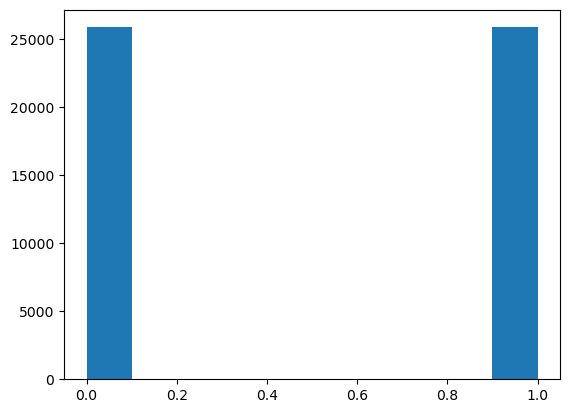

In [22]:
plt.hist(y_train_over)

### creating the LogisticRegression model

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=10000)
lr_model.fit(x_train_over, y_train_over)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [24]:
lr_y_pred = lr_model.predict(x_test)

In [25]:
accuracy = np.sum(lr_y_pred == y_test) / len(y_test)
print(accuracy)

0.8690441813456541


In [26]:
from sklearn.metrics import classification_report
result = classification_report(y_test, lr_y_pred)
print(result)

              precision    recall  f1-score   support

         0.0       0.24      0.46      0.32       462
         1.0       0.96      0.90      0.93      6464

    accuracy                           0.87      6926
   macro avg       0.60      0.68      0.62      6926
weighted avg       0.91      0.87      0.89      6926



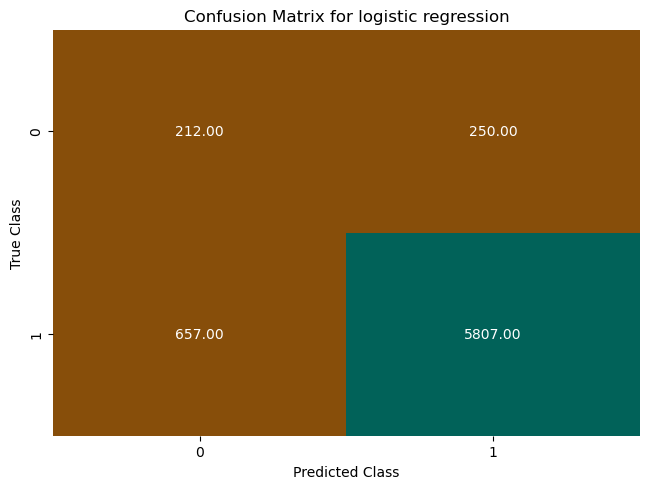

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
colormap = sns.color_palette("BrBG", 10)
df_confusion = confusion_matrix(y_test, lr_y_pred) 
sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
plt.title("Confusion Matrix for logistic regression")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

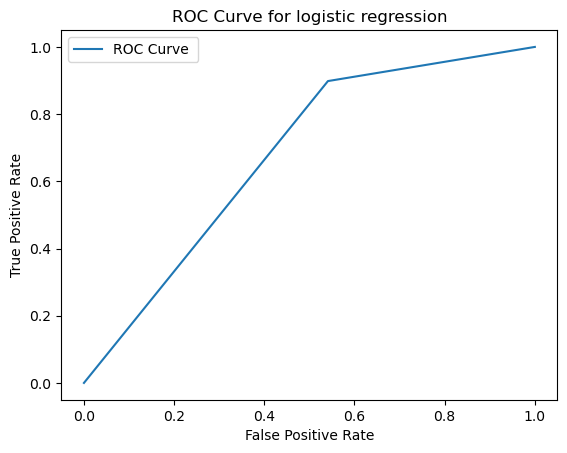

In [28]:
from sklearn.metrics import roc_curve, auc
# Calculate the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_y_pred)
#roc_auc = auc(fpr, tpr)
# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC Curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic regression')
plt.legend()
plt.show()

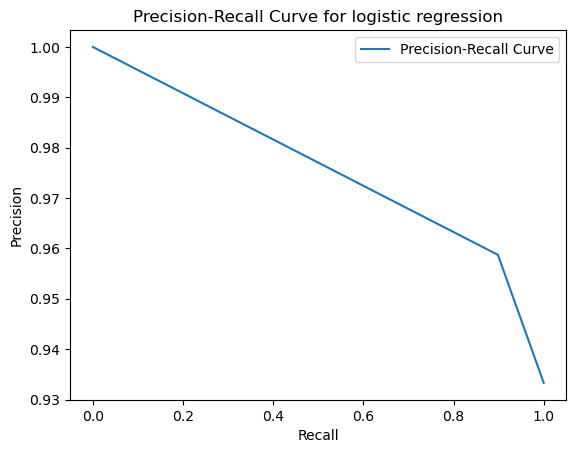

In [29]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_y_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for logistic regression')
plt.legend()
plt.show()

### creating the Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=5,random_state=84)
dtc_model.fit(x_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, random_state=84)

In [31]:
y_pred = dtc_model.predict(x_test)

In [32]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.6309558186543459


In [33]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

         0.0       0.12      0.70      0.20       462
         1.0       0.97      0.63      0.76      6464

    accuracy                           0.63      6926
   macro avg       0.54      0.66      0.48      6926
weighted avg       0.91      0.63      0.72      6926



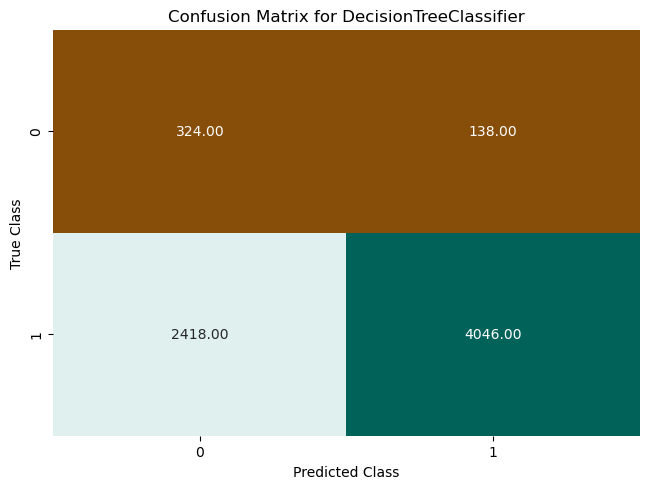

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
colormap = sns.color_palette("BrBG", 10)
df_confusion = confusion_matrix(y_test, y_pred) 
sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
plt.title("Confusion Matrix for DecisionTreeClassifier")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

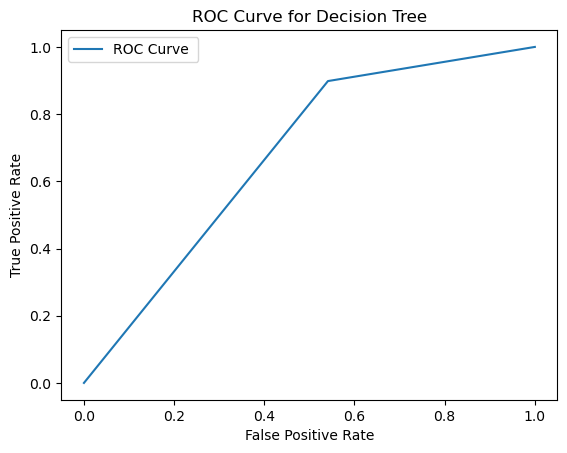

In [35]:
from sklearn.metrics import roc_curve, auc
# Calculate the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_y_pred)
#roc_auc = auc(fpr, tpr)
# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC Curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

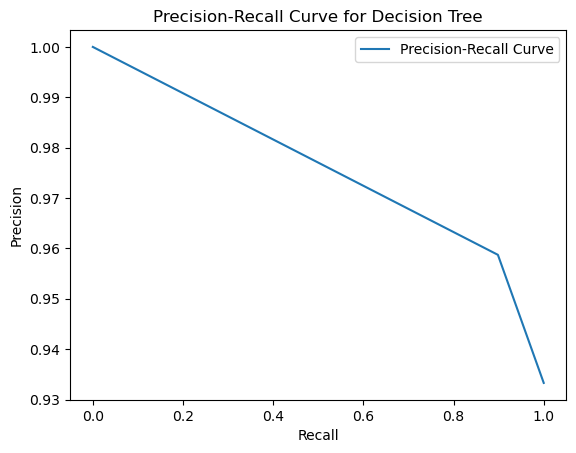

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_y_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend()
plt.show()

### creating the xgboost Model

In [37]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate =0.01, n_estimators=150, max_depth=8)
xgb_model.fit(x_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
xgb_y_pred = xgb_model.predict(x_test)

In [39]:
accuracy = np.sum(xgb_y_pred == y_test) / len(y_test)
print(accuracy)

0.9332948310713255


In [40]:
result = classification_report(y_test, xgb_y_pred)
print(result)

              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06       462
         1.0       0.94      1.00      0.97      6464

    accuracy                           0.93      6926
   macro avg       0.72      0.52      0.52      6926
weighted avg       0.91      0.93      0.91      6926



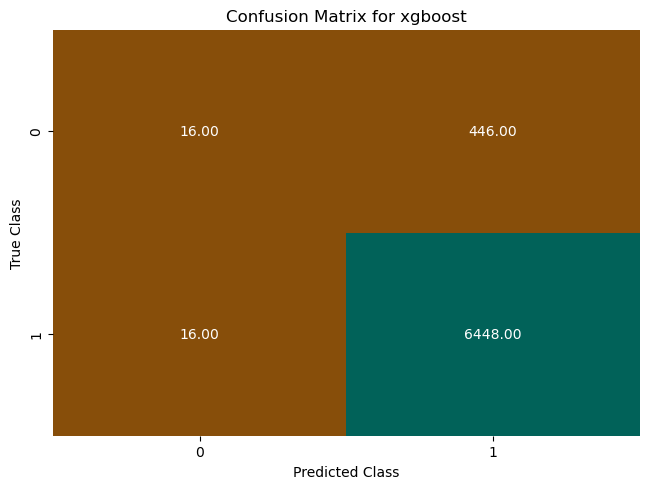

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
colormap = sns.color_palette("BrBG", 10)
df_confusion = confusion_matrix(y_test, xgb_y_pred) 
sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
plt.title("Confusion Matrix for xgboost")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

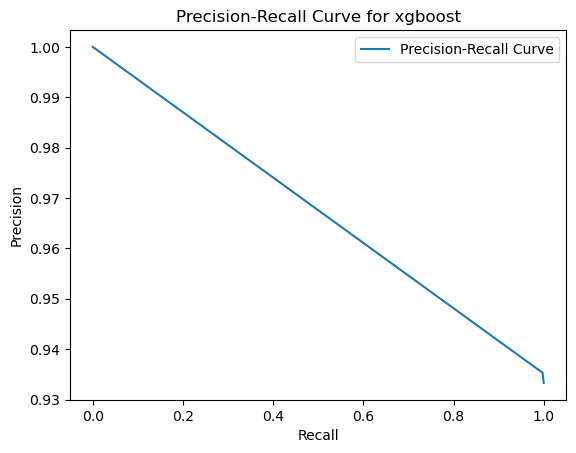

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_y_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for xgboost')
plt.legend()
plt.show()

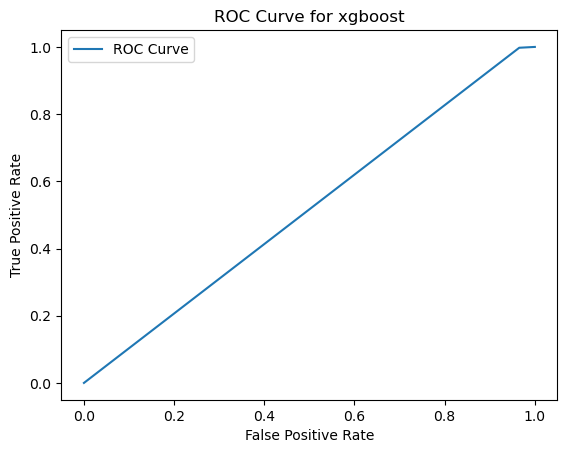

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_pred)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for xgboost')
plt.legend()
plt.show()